In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading Dataset as a dataframe

In [2]:
df=pd.read_csv('CarPrice_Assignment.csv')
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


**Exploratory Data Analysis**

In [3]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

Dataframe has total 26 columns, 8 having float data type, 8 having integer datatype and 10 having object datatype all having no null value.

In [5]:
df['CarName'] = df['CarName'].str.split(' ',expand=True)[0]
df["CarName"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

Resolving naming and spelling variation issue

In [6]:
df['CarName'] = df['CarName'].replace({'maxda': 'mazda', 'nissan': 'Nissan', 'porcshce': 'porsche', 'toyouta': 'toyota',
                            'vokswagen': 'volkswagen', 'vw': 'volkswagen'})

In [7]:
df.duplicated().sum().sum()

0

Categorizing columns are numeric and categorical features

In [8]:
cat_col = df.select_dtypes(include=['object']).columns
num_col = df.select_dtypes(exclude=['object']).columns
df[cat_col]=df[cat_col].astype(str)
data_cat = df[cat_col]
data_num = df[num_col]


Visualizing count of cars based on companies

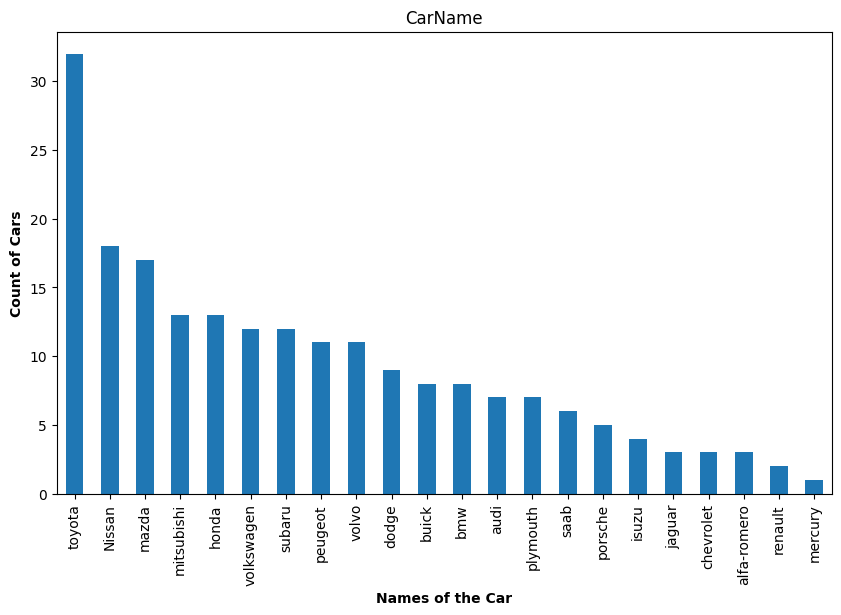

In [9]:
Cars = df['CarName'].value_counts()
plt.figure(figsize=(10, 6))  # Set the figure size (optional)
Cars.plot(kind='bar')
plt.title('CarName')
plt.xlabel("Names of the Car",fontweight = 'bold')
plt.ylabel("Count of Cars",fontweight = 'bold')
plt.show()

The graph shows the sold cars are of Toyotta follow by Nissan and Mazda

Distribution of Cars price

<Axes: title={'center': 'Car Price Distribution Plot'}, xlabel='price', ylabel='Count'>

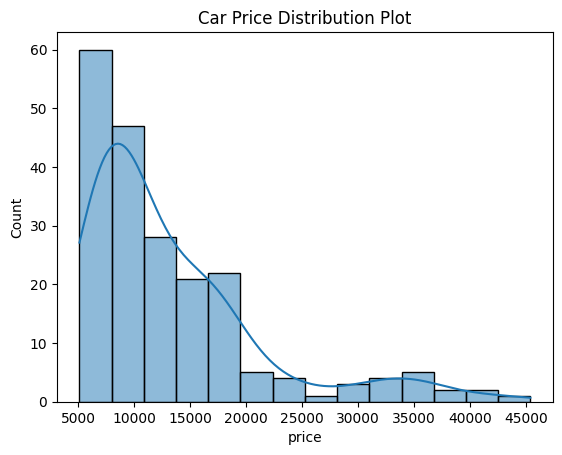

In [10]:
plt.title('Car Price Distribution Plot')
sns.histplot(df["price"], kde=True)

The price of cars mostly fall in the range of $ 5000-20000

Visualizing impact of various numerical columns on car price

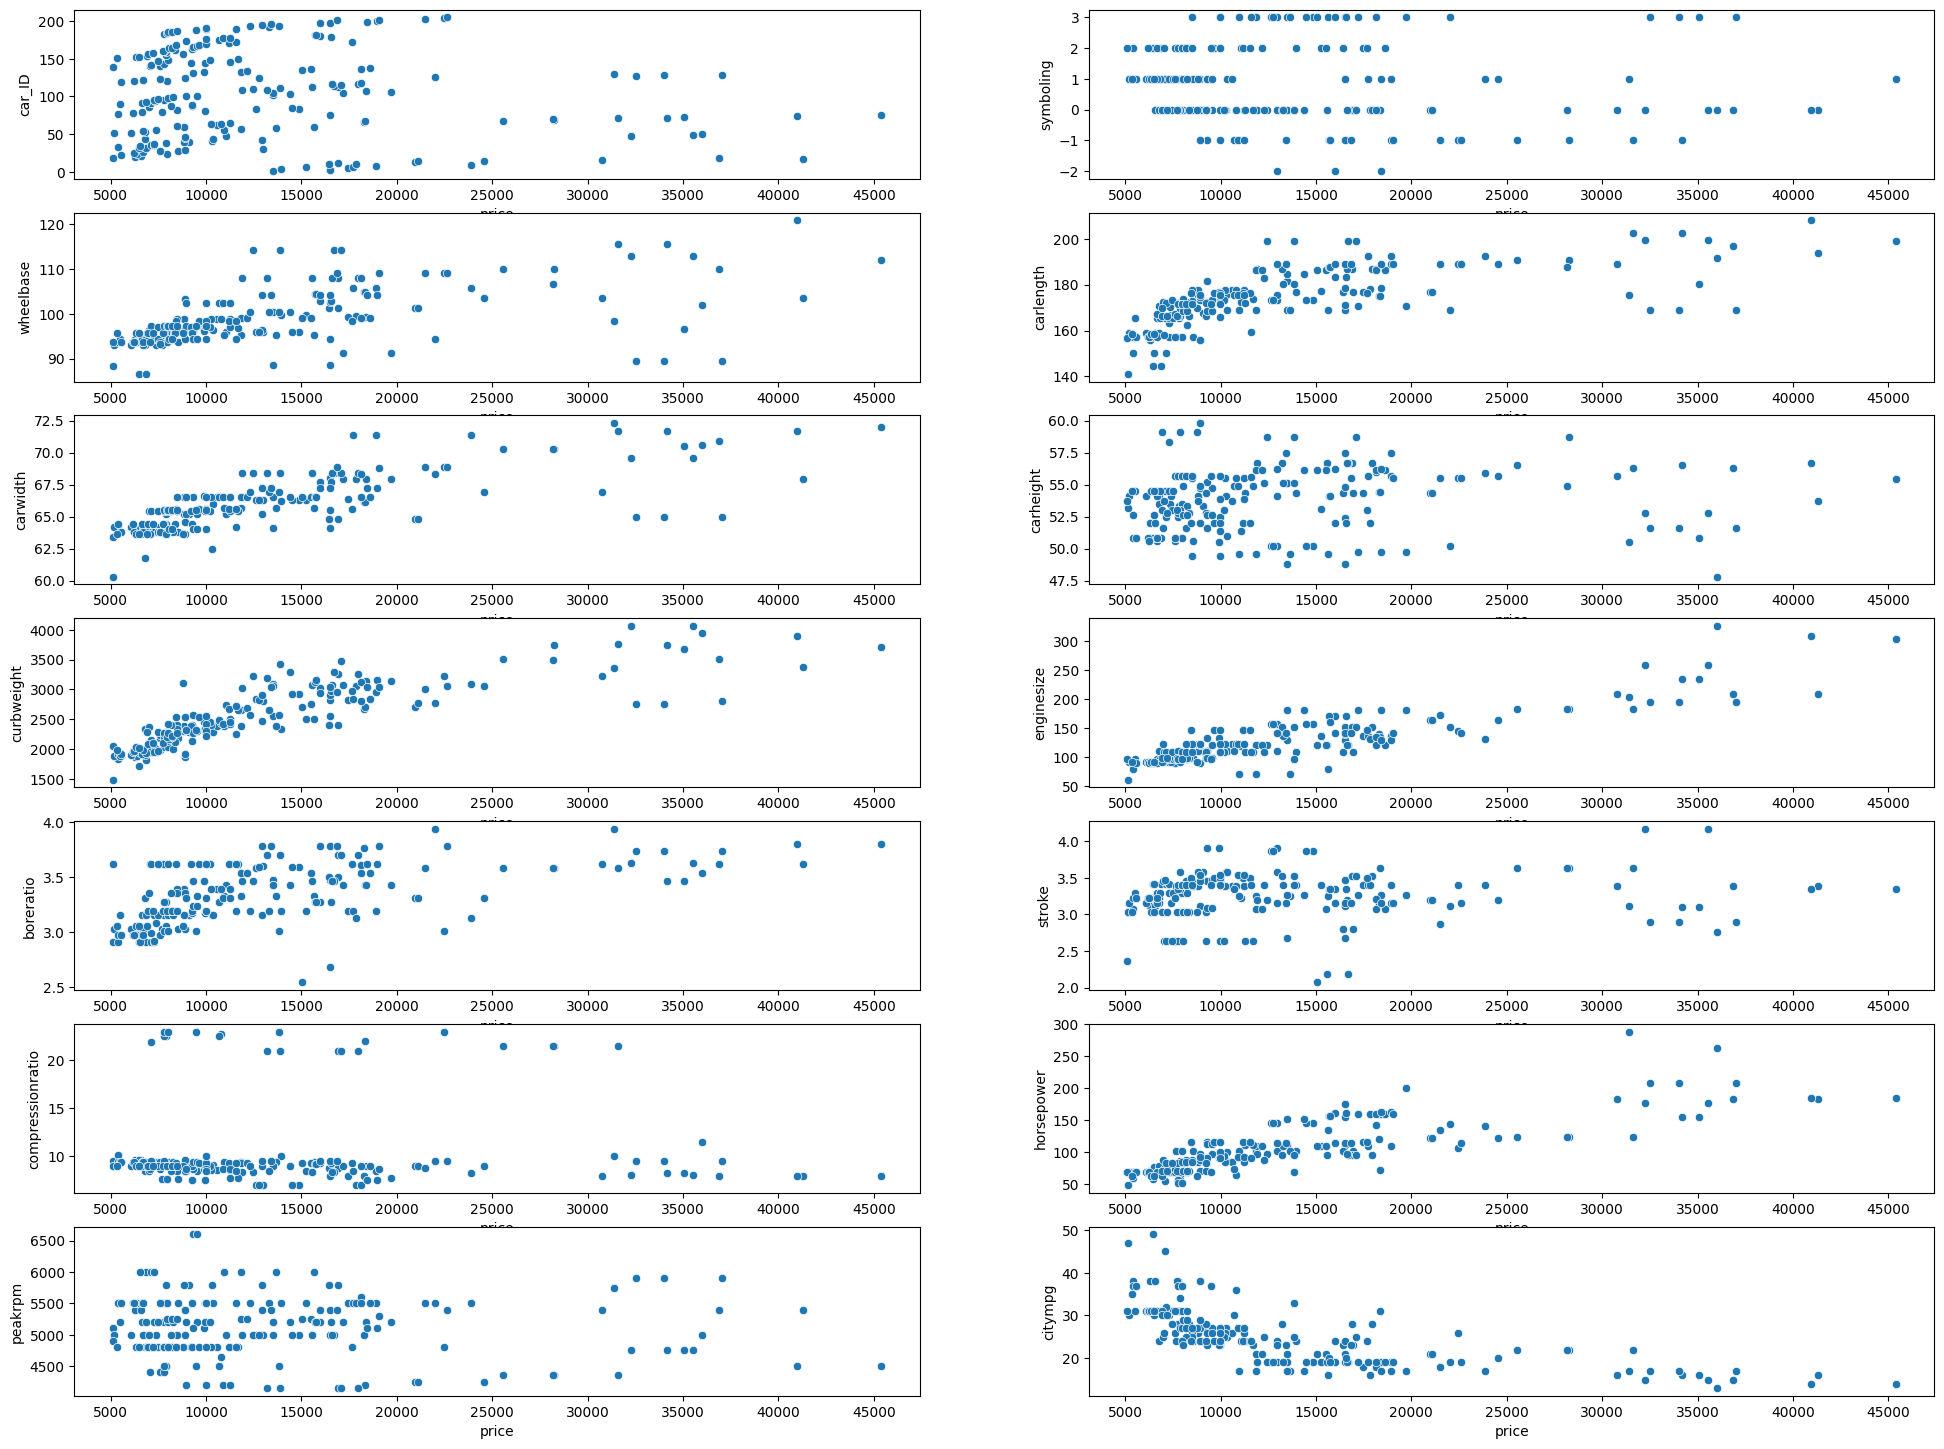

In [11]:
fig, axes = plt.subplots(7,2 , figsize=(24,18))
axes = axes.flatten()
features = data_num.columns[:-2]
for i in range(len(features)):
    sns.scatterplot(data=df, x=df["price"],y=features[i], ax=axes[i])


Visualizing impact of categorical columns on price of cars

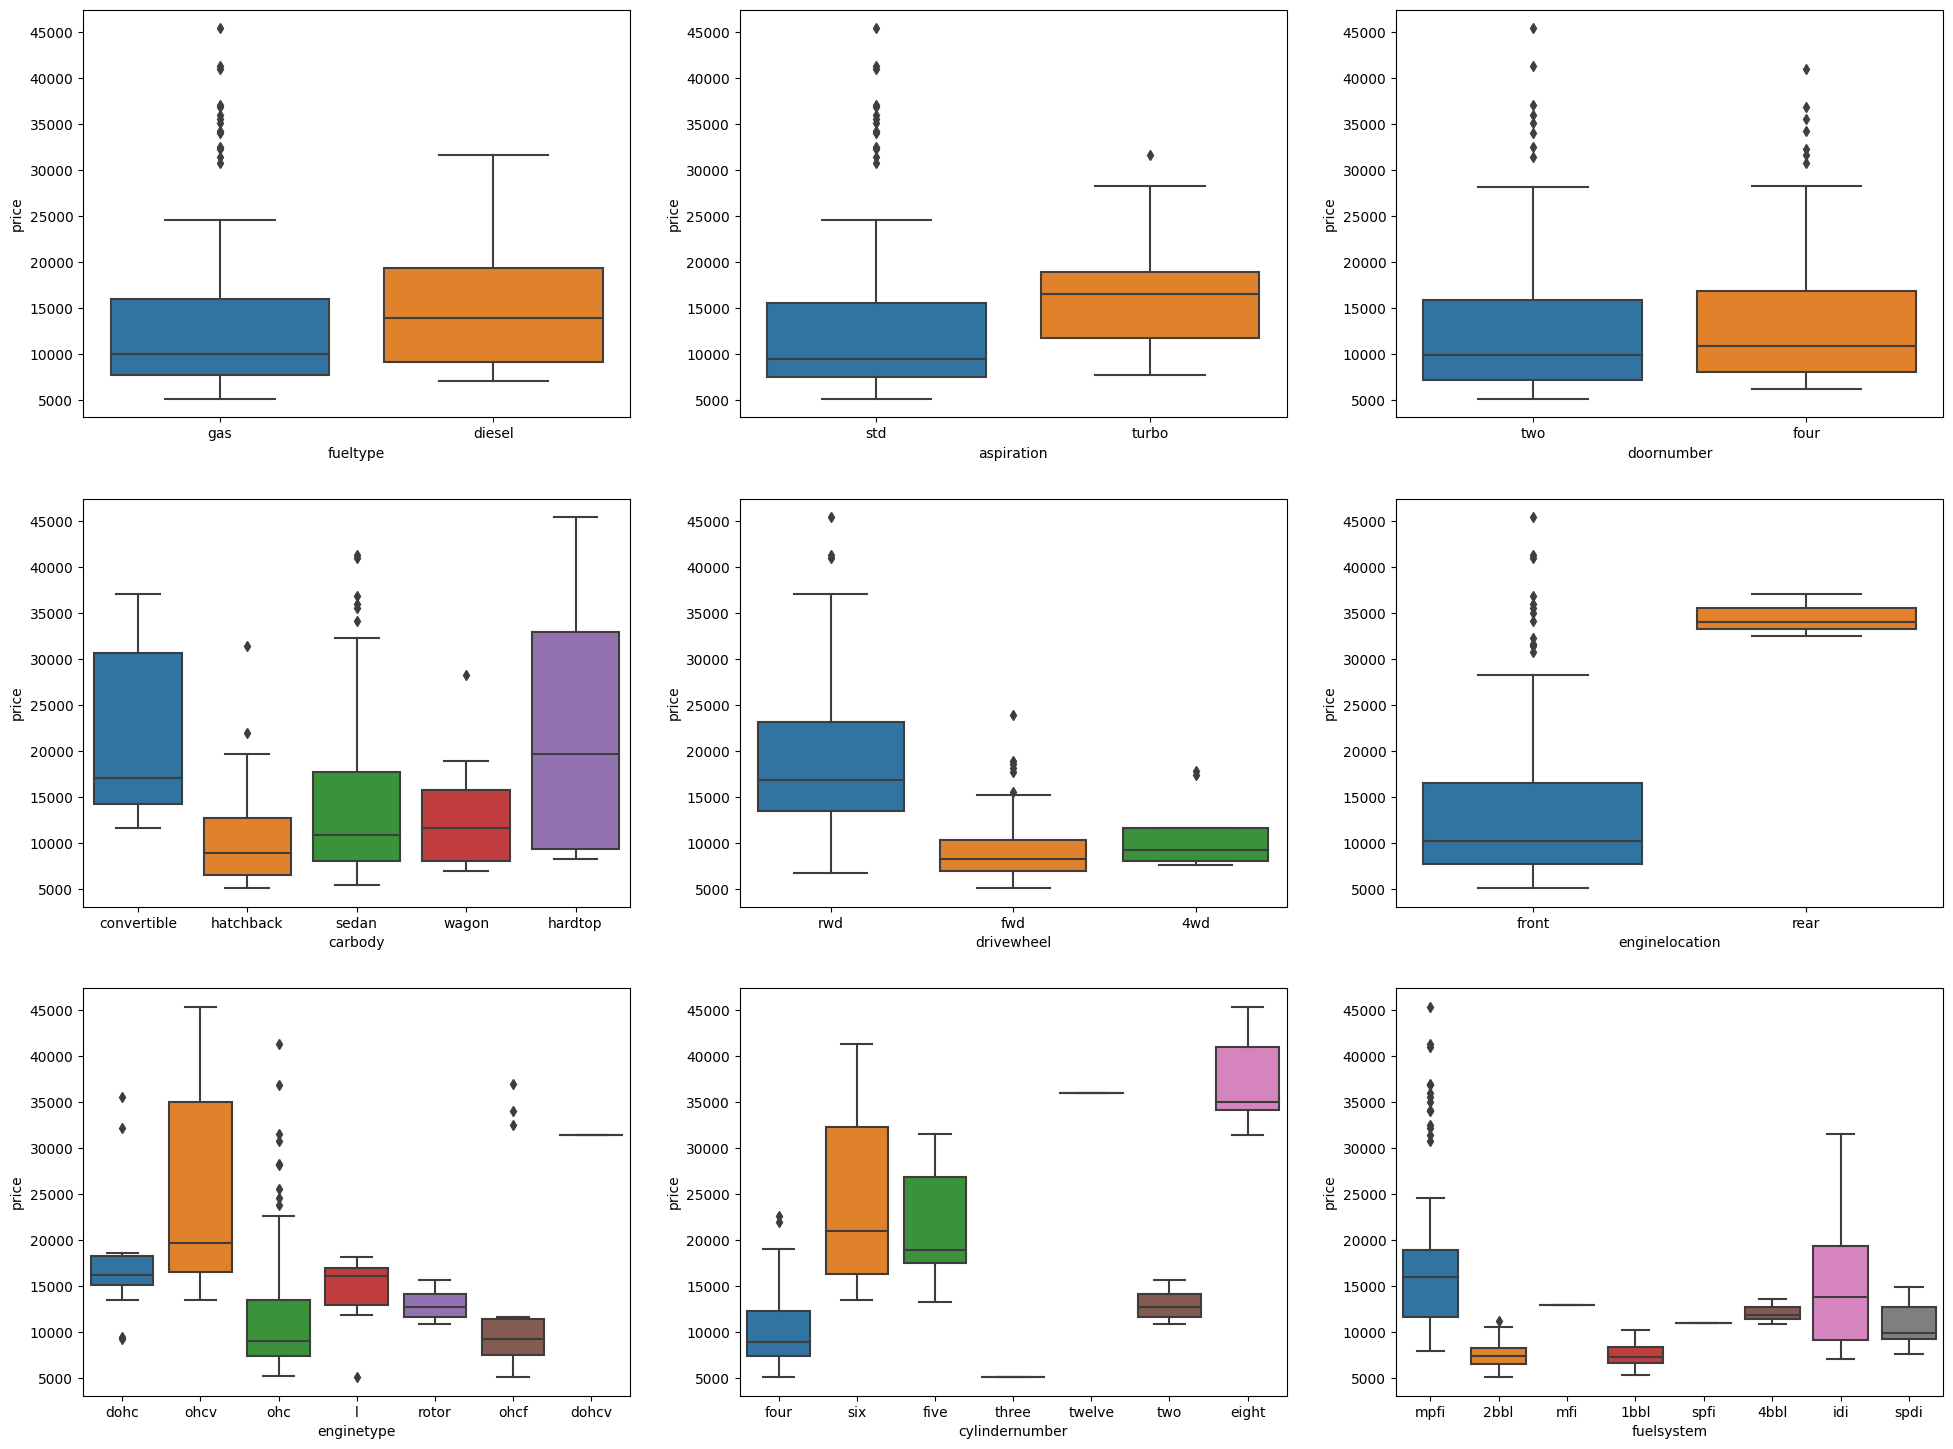

In [12]:
fig, axes = plt.subplots(3,3 , figsize=(24,18))
axes = axes.flatten()
features = list(data_cat.columns)
features.remove("CarName")
for i in range(len(features)):
    sns.boxplot(x = features[i], y =df['price'], data= df,ax=axes[i])
plt.show()

Removing the least related columns

In [13]:
df=df.drop(['car_ID','CarName','symboling','fuelsystem','doornumber','carheight','stroke','compressionratio','peakrpm','enginelocation'],axis=1)
df

,fueltype,aspiration,carbody,drivewheel,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,citympg,highwaympg,price
0,gas,std,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,130,3.47,111,21,27,13495.0
1,gas,std,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,130,3.47,111,21,27,16500.0
2,gas,std,hatchback,rwd,94.5,171.2,65.5,2823,ohcv,six,152,2.68,154,19,26,16500.0
3,gas,std,sedan,fwd,99.8,176.6,66.2,2337,ohc,four,109,3.19,102,24,30,13950.0
4,gas,std,sedan,4wd,99.4,176.6,66.4,2824,ohc,five,136,3.19,115,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,gas,std,sedan,rwd,109.1,188.8,68.9,2952,ohc,four,141,3.78,114,23,28,16845.0
201,gas,turbo,sedan,rwd,109.1,188.8,68.8,3049,ohc,four,141,3.78,160,19,25,19045.0
202,gas,std,sedan,rwd,109.1,188.8,68.9,3012,ohcv,six,173,3.58,134,18,23,21485.0
203,diesel,turbo,sedan,rwd,109.1,188.8,68.9,3217,ohc,six,145,3.01,106,26,27,22470.0


Classifying cars price based on price in 3 groups/classes

In [14]:
df.loc[ df['price'] <= 20000, 'priceCatagory'] = 0
df.loc[(df['price'] > 20000) & (df['price'] <= 40000), 'priceCatagory'] = 1
df.loc[ df['price'] > 40000, 'priceCatagory'] = 2
df["priceCatagory"]=df["priceCatagory"].astype(int)

Encoding Categorical features into numerical ones

In [15]:
from sklearn.preprocessing import LabelEncoder
cat=["enginetype","fueltype","aspiration","carbody","cylindernumber","drivewheel"]
for x in cat:
   lb = LabelEncoder()
   df[x]= lb.fit_transform(df[x])
df.head()

,fueltype,aspiration,carbody,drivewheel,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,citympg,highwaympg,price,priceCatagory
0,1,0,0,2,88.6,168.8,64.1,2548,0,2,130,3.47,111,21,27,13495.0,0
1,1,0,0,2,88.6,168.8,64.1,2548,0,2,130,3.47,111,21,27,16500.0,0
2,1,0,2,2,94.5,171.2,65.5,2823,5,3,152,2.68,154,19,26,16500.0,0
3,1,0,3,1,99.8,176.6,66.2,2337,3,2,109,3.19,102,24,30,13950.0,0
4,1,0,3,0,99.4,176.6,66.4,2824,3,1,136,3.19,115,18,22,17450.0,0


Dropping price column to use it as classification column

In [16]:
x = df.drop("price",axis=1)
y = df["price"]

Normalization of numerical values using MinMax Scaler



In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x= scaler.fit_transform(x)
df.head()

,fueltype,aspiration,carbody,drivewheel,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,citympg,highwaympg,price,priceCatagory
0,1,0,0,2,88.6,168.8,64.1,2548,0,2,130,3.47,111,21,27,13495.0,0
1,1,0,0,2,88.6,168.8,64.1,2548,0,2,130,3.47,111,21,27,16500.0,0
2,1,0,2,2,94.5,171.2,65.5,2823,5,3,152,2.68,154,19,26,16500.0,0
3,1,0,3,1,99.8,176.6,66.2,2337,3,2,109,3.19,102,24,30,13950.0,0
4,1,0,3,0,99.4,176.6,66.4,2824,3,1,136,3.19,115,18,22,17450.0,0


Splitting data into training and testing

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Model implementation and evaluation

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
model = LinearRegression()
model.fit(X_train,y_train)
preds=model.predict(X_test)
print(r2_score(preds,y_test))

0.9402100010781868


In [20]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train,y_train)
preds=model.predict(X_test)
print(r2_score(preds,y_test))

0.9512598907210518
